In [9]:
from mnist import MNIST
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

In [2]:
mndata = MNIST('path_to_mnist') #write the path to mnist-files here

images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()

In [15]:
def filter_data(images, labels, digits):
    im = [images[i] for i in range(len(images)) if labels[i] in digits]
    lab = [labels[i] for i in range(len(images)) if labels[i] in digits]
    return im, lab

In [21]:
images_train, labels_train = filter_data(images_train, labels_train, [3,5,7])
images_test, labels_test = filter_data(images_test, labels_test, [3,5,7])

In [17]:
labels_train

[5,
 3,
 3,
 5,
 3,
 7,
 3,
 7,
 3,
 5,
 7,
 7,
 3,
 5,
 3,
 3,
 7,
 5,
 7,
 3,
 7,
 7,
 3,
 7,
 7,
 3,
 5,
 7,
 7,
 3,
 3,
 7,
 3,
 5,
 3,
 3,
 5,
 7,
 7,
 5,
 7,
 3,
 3,
 7,
 7,
 5,
 5,
 3,
 3,
 5,
 7,
 5,
 7,
 7,
 3,
 3,
 3,
 7,
 7,
 3,
 5,
 7,
 3,
 7,
 3,
 5,
 5,
 3,
 7,
 5,
 3,
 3,
 3,
 7,
 5,
 7,
 5,
 5,
 5,
 3,
 3,
 5,
 5,
 7,
 3,
 3,
 7,
 7,
 5,
 7,
 5,
 3,
 7,
 3,
 5,
 3,
 5,
 5,
 7,
 7,
 3,
 7,
 7,
 3,
 3,
 7,
 7,
 5,
 7,
 7,
 7,
 3,
 5,
 5,
 3,
 5,
 7,
 5,
 5,
 7,
 3,
 7,
 3,
 7,
 5,
 7,
 3,
 3,
 5,
 7,
 7,
 5,
 7,
 3,
 5,
 7,
 3,
 3,
 3,
 5,
 7,
 3,
 5,
 5,
 7,
 3,
 7,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 5,
 5,
 3,
 5,
 5,
 3,
 3,
 5,
 3,
 7,
 3,
 7,
 7,
 3,
 5,
 3,
 7,
 7,
 7,
 5,
 7,
 3,
 5,
 7,
 5,
 5,
 7,
 5,
 3,
 7,
 7,
 5,
 7,
 7,
 3,
 7,
 3,
 7,
 5,
 5,
 7,
 3,
 3,
 3,
 5,
 7,
 7,
 5,
 3,
 5,
 7,
 3,
 5,
 5,
 7,
 7,
 7,
 7,
 3,
 5,
 7,
 5,
 3,
 7,
 5,
 3,
 3,
 5,
 5,
 7,
 5,
 5,
 7,
 3,
 7,
 7,
 5,
 7,
 5,
 3,
 3,
 5,
 7,
 7,
 7,
 5,
 5,
 5,
 7,
 3,
 3,
 5,
 7,
 3,
 3,
 3,


In [10]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28))).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

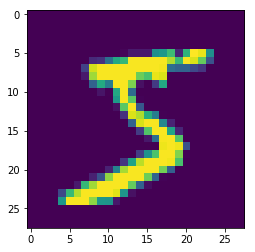

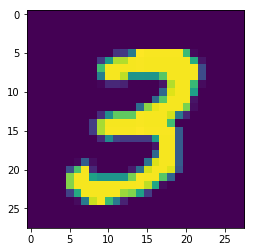

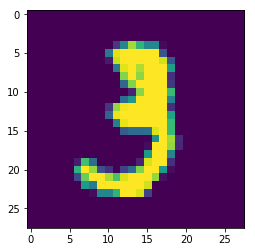

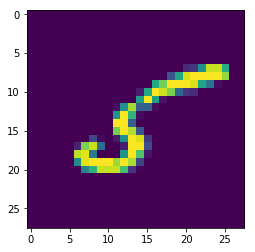

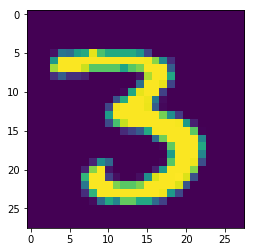

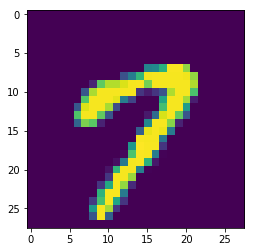

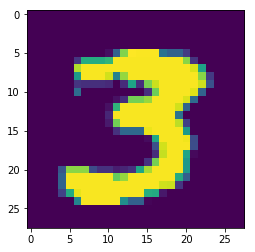

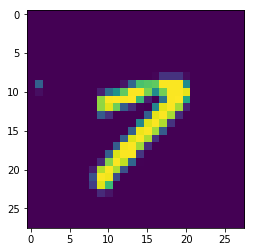

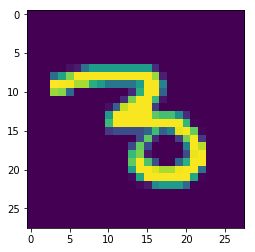

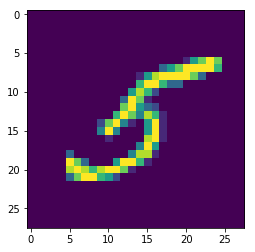

In [18]:
for k in range(10):
    gen_image(images_train[k]).show()

In [4]:
def euclid_distance(images1, images2):
    ims1 = np.array(images1)
    ims2 = np.array(images2)
    return cdist(ims1, ims2, p=2)

In [20]:
class kNN:
    def __init__(self, images_train, labels_train):
        self.images_train = images_train
        self.labels_train = labels_train
       
    def count_neighbors(self, distance, k):
        distances = [(distance[i], self.labels_train[i]) for i in range(len(self.images_train))]
        distances.sort(key=lambda tup: tup[0])

        count_neighbors = {}
        for i in range(k):
            if not distances[i][1] in count_neighbors:
                count_neighbors[distances[i][1]] = 1
            else:
                count_neighbors[distances[i][1]] += 1

        return max(count_neighbors, key=count_neighbors.get)

    def calc_distances(self, images):
        return euclid_distance(self.images_train, images)

    def classify(self, distances, k):
        return [self.count_neighbors(distances[:,i],k ) for i in range(len(distances[0]))]

In [24]:
classifier = kNN(images_train, labels_train)
dist = classifier.calc_distances(images_test[:300])

In [25]:
for k in [1, 3, 5, 10, 30, 100]:
    labels = classifier.classify(dist,k)
    error = sum(0 if labels[i] == labels_test[i] else 1 for i in range(len(labels))) * 100.0 / len(labels)
    print(error)

2.6666666666666665
2.3333333333333335
1.6666666666666667
1.6666666666666667
1.6666666666666667
2.6666666666666665
